<a href="https://colab.research.google.com/github/animated-boi/CSE546-Cloud-Computing/blob/main/Animesh_Chaudhary_CSE572_Lab5_Group40_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 572: Lab 5

In this lab, you will practice implementing different variations of the Support Vector Machine (SVM) classifier.

To execute and make changes to this notebook, click File > Save a copy to save your own version in your Google Drive or Github. Read the step-by-step instructions below carefully. To execute the code, click on each cell below and press the SHIFT-ENTER keys simultaneously or by clicking the Play button.

When you finish executing all code/exercises, save your notebook then download a copy (.ipynb file). Submit the following **three** things:
1. a link to your Colab notebook,
2. the .ipynb file, and
3. a pdf of the executed notebook on Canvas.

To generate a pdf of the notebook, please use the instructions on Lab 0.


Make sure you signed up a group (even if you decide to work on your own) on Canvas under "People->Group for Lab 5".

# **PUT YOUR GROUP INFO HERE**

| Group number | Lab 5 Group 40   |            |
|--------------|------------------|------------|
| Member 1     | Animesh Chaudhary| achaud81   |
| Member 2     |                  |            |
| Member 3     |                  |            |
| Member 4     |                  |            |

### Load the iris dataset

Load the dataset. For visualization purposes for the first exercise, we will convert the dataframe to have only two features (petal length and petal width) and two classes (Iris-virginica and Iris-other).

In [1]:
import pandas as pd

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Drop the sepal features
data = data.drop(['sepal length', 'sepal width'], axis=1)

data.head()

,petal length,petal width,class
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [3]:
# Replace the Iris-setosa and Iris-versicolor classes with Iris-other
data['class'] = data['class'].replace('Iris-versicolor', 'Iris-other')
data['class'] = data['class'].replace('Iris-setosa', 'Iris-other')

Next, we will split our dataset into three subsets: training (60%), validation (20%), and test (20%).

In [4]:
import numpy as np

# The first parameter is the shuffled data frame
# The second parameter is the split indices which are at 60% of the data and 80% of the data
train, val, test = np.split(data.sample(frac=1, random_state=42), [int(.6*len(data)), int(.8*len(data))])

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Print the number of samples in each of the three subsets and the number of instances from each class. For example, for the training set you might print "The training set has __ instances (__ virginica, __ other)".

In [6]:
# YOUR CODE HERE
# Counting class instances
def print_dataset_info(name, dataset):
    class_counts = dataset['class'].value_counts()
    print(f"The {name} set has {len(dataset)} instances ({class_counts.get('Iris-virginica', 0)} virginica, {class_counts.get('Iris-other', 0)} other)")

print_dataset_info("training", train)
print_dataset_info("validation", val)
print_dataset_info("test", test)

The training set has 90 instances (26 virginica, 64 other)
The validation set has 30 instances (12 virginica, 18 other)
The test set has 30 instances (12 virginica, 18 other)


## Support vector machines
Support vector machines (SVMs) are a supervised learning method that finds the hyperplane (or set of hyperplanes) in the $n$-dimensional feature space (where $n$ is the number of input features) which maximizes the distance to the nearest training samples from each class. Maximizing this margin ensures that the decision boundary will be as generalizable as possible to new, unseen data points.

In [7]:
# import the Support vector classifier
from sklearn.svm import SVC

The main hyperparameter to choose is the regularization parameter $C$, which represents the strength of the penalty incurred during training for allowing samples to be closer to the margin boundary (since a perfect decision boundary is not attainable for most problems).

SVM also uses a kernel function $K$ to map samples to a higher dimensional space (this is referred to as the "kernel trick"). The SVM implementation in scikit-learn gives four options for the kernel function: linear (this is the standard SVM without non-linear kernel), polynomial, radial basis function (RBF), and sigmoid.

The below example uses a linear kernel with $C=0.1$.

In [8]:
C = 0.1
linear_svc = SVC(kernel='linear', C=C)

In [9]:
# train the SVM classifier
linear_svc.fit(train[['petal length','petal width']], train['class'])

SVC(C=0.1, kernel='linear')

The following function for plotting the decision boundary is from the [Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html).  The function plots the decision boundary as a gray solid line and the margins as gray dashed lines. The support vectors are circled.

In [10]:
import matplotlib.pyplot as plt

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='gray');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Plot the dataset and the learned decision boundary.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


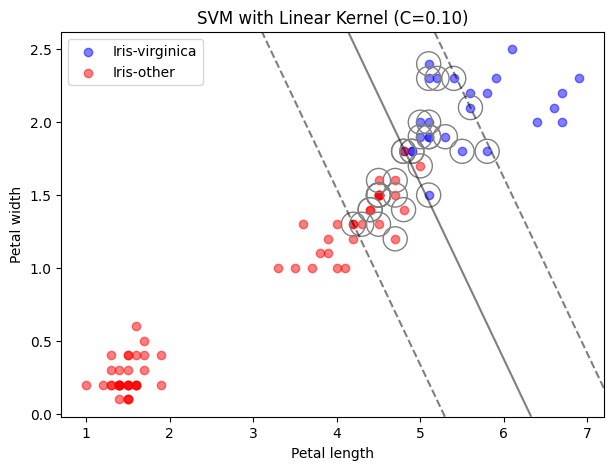

In [11]:
fig, ax = plt.subplots(1, figsize=(7,5))
# Plot the setosa instances
ax.scatter(train[train['class'] == 'Iris-virginica']['petal length'],
               train[train['class'] == 'Iris-virginica']['petal width'],
               label='Iris-virginica',
               color='blue',
               alpha=0.5)
# Plot the other instances
ax.scatter(train[train['class'] == 'Iris-other']['petal length'],
               train[train['class'] == 'Iris-other']['petal width'],
               label='Iris-other',
               color='red',
               alpha=0.5)

plot_svc_decision_function(linear_svc, ax=ax)
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()
ax.set_title('SVM with Linear Kernel (C=%0.2f)' % C);

Train a new model with $C=100$ and plot the resulting decision boundary.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


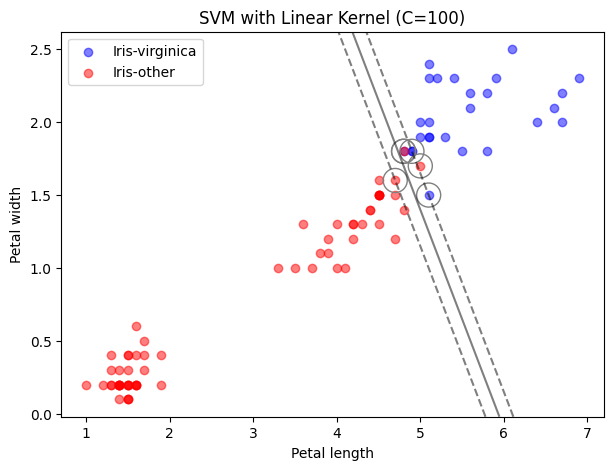

In [12]:
# YOUR CODE HERE

C_new = 100
linear_svc_highC = SVC(kernel='linear', C=C_new)
linear_svc_highC.fit(train[['petal length','petal width']], train['class'])

# Plotting the new decision boundary
fig, ax = plt.subplots(1, figsize=(7,5))

# Plotting the Iris-virginica instances in blue
ax.scatter(train[train['class'] == 'Iris-virginica']['petal length'],
           train[train['class'] == 'Iris-virginica']['petal width'],
           label='Iris-virginica',
           color='blue',
           alpha=0.5)

# Plotting the Iris-other instances in red
ax.scatter(train[train['class'] == 'Iris-other']['petal length'],
           train[train['class'] == 'Iris-other']['petal width'],
           label='Iris-other',
           color='red',
           alpha=0.5)

# Plotting the new SVM decision boundary
plot_svc_decision_function(linear_svc_highC, ax=ax)

# Labels and title
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()
ax.set_title(f'SVM with Linear Kernel (C={C_new})')


plt.show()


**Question 1:**

How did a higher value of $C$ affect the decision boundary? Why?

**Answer:**

A higher C (C=100) results in a tighter margin, reducing misclassification but making the model less flexible. The decision boundary is more rigid, with fewer support vectors, leading to better training accuracy but potential overfitting and poorer generalization to unseen data.


Compute and print the accuracy of each classifier (with $C=0.1$ and $C=100$) on the validation set.

In [13]:
from sklearn.metrics import accuracy_score
# YOUR CODE HERE

# Predictions using both models
y_pred_C_0_1 = linear_svc.predict(val[['petal length', 'petal width']])
y_pred_C_100 = linear_svc_highC.predict(val[['petal length', 'petal width']])

# Accuracy
accuracy_C_0_1 = accuracy_score(val['class'], y_pred_C_0_1)
accuracy_C_100 = accuracy_score(val['class'], y_pred_C_100)

print(f"Accuracy with C=0.1: {accuracy_C_0_1:.4f}")
print(f"Accuracy with C=100: {accuracy_C_100:.4f}")


Accuracy with C=0.1: 0.9000
Accuracy with C=100: 0.9667


**Question 2:**

Which value of $C$ resulted in higher validation accuracy?

**Answer:**

The higher value of C (C=100) resulted in a higher validation accuracy (96.67% vs. 90.00% for C=0.1). This is because a larger C enforces a stricter decision boundary, reducing misclassification on the training data, leading to better performance on the validation set in this case.

In addition to linear SVM, we can also implement SVM with polynomial, radial basis function (RBF), and sigmoid kernels. Train an SVM classifier with each kernel separately. Set $C$ to be the value of $C$ with highest validation accuracy from Question 2.

You may need to consult the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). The polynomial kernel requires the `degree` parameter to be passed; use `degree=3`.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


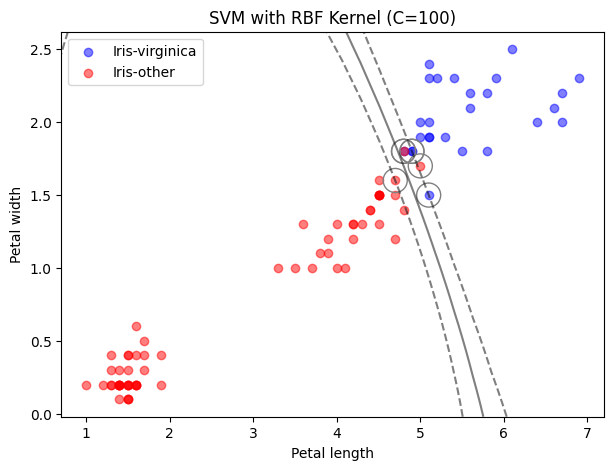

In [15]:
# RBF
# YOUR CODE HERE
# Training SVM with RBF kernel
rbf_svc = SVC(kernel='rbf', C=100)
rbf_svc.fit(train[['petal length', 'petal width']], train['class'])

# Decision boundary
fig, ax = plt.subplots(1, figsize=(7,5))

# Iris-virginica instances in blue
ax.scatter(train[train['class'] == 'Iris-virginica']['petal length'],
           train[train['class'] == 'Iris-virginica']['petal width'],
           label='Iris-virginica',
           color='blue',
           alpha=0.5)

# Iris-other instances in red
ax.scatter(train[train['class'] == 'Iris-other']['petal length'],
           train[train['class'] == 'Iris-other']['petal width'],
           label='Iris-other',
           color='red',
           alpha=0.5)

# Plotting the SVM decision boundary
plot_svc_decision_function(rbf_svc, ax=ax)

# Labels and title
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()
ax.set_title(f'SVM with RBF Kernel (C=100)')


plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


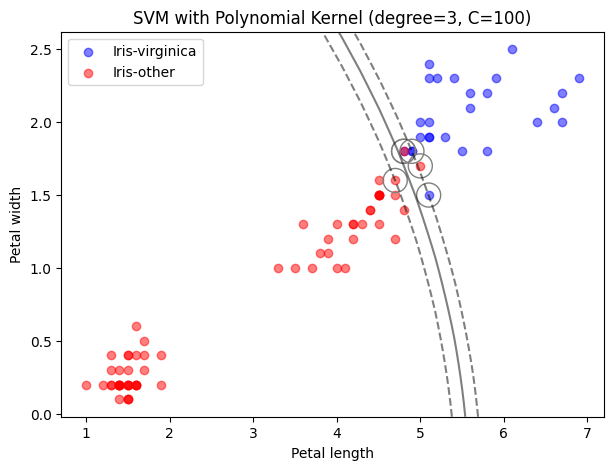

In [16]:
# Polynomial (degree=3)
# YOUR CODE HERE
# SVM with Polynomial kernel
poly_svc = SVC(kernel='poly', degree=3, C=100)
poly_svc.fit(train[['petal length', 'petal width']], train['class'])

# Decision boundary
fig, ax = plt.subplots(1, figsize=(7,5))

# Iris-virginica instances in blue
ax.scatter(train[train['class'] == 'Iris-virginica']['petal length'],
           train[train['class'] == 'Iris-virginica']['petal width'],
           label='Iris-virginica',
           color='blue',
           alpha=0.5)

# Iris-other instances in red
ax.scatter(train[train['class'] == 'Iris-other']['petal length'],
           train[train['class'] == 'Iris-other']['petal width'],
           label='Iris-other',
           color='red',
           alpha=0.5)

# Plotting the SVM decision boundary
plot_svc_decision_function(poly_svc, ax=ax)

# Labels and title
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()
ax.set_title(f'SVM with Polynomial Kernel (degree=3, C=100)')


plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


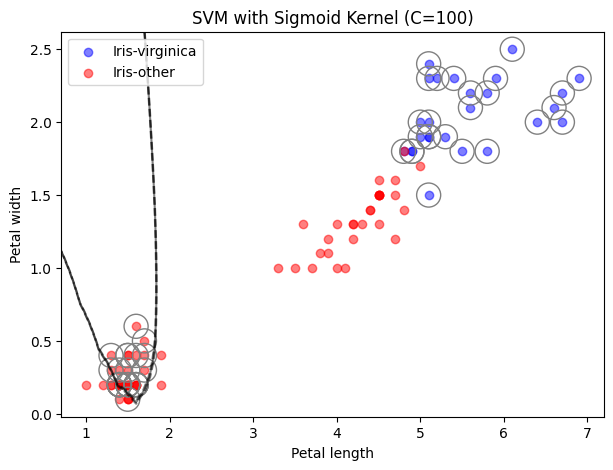

In [17]:
# Sigmoid
# YOUR CODE HERE

# SVM with Sigmoid kernel
sigmoid_svc = SVC(kernel='sigmoid', C=100)
sigmoid_svc.fit(train[['petal length', 'petal width']], train['class'])

# Decision boundary
fig, ax = plt.subplots(1, figsize=(7,5))

# Iris-virginica instances in blue
ax.scatter(train[train['class'] == 'Iris-virginica']['petal length'],
           train[train['class'] == 'Iris-virginica']['petal width'],
           label='Iris-virginica',
           color='blue',
           alpha=0.5)

# Iris-other instances in red
ax.scatter(train[train['class'] == 'Iris-other']['petal length'],
           train[train['class'] == 'Iris-other']['petal width'],
           label='Iris-other',
           color='red',
           alpha=0.5)

# Plotting the SVM decision boundary
plot_svc_decision_function(sigmoid_svc, ax=ax)

# Labels and title
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()
ax.set_title(f'SVM with Sigmoid Kernel (C=100)')


plt.show()


Compute and print the validation accuracy for each of the 3 classifiers.

In [18]:
# YOUR CODE HERE
from sklearn.metrics import accuracy_score

# Predictions on the validation set
y_pred_poly = poly_svc.predict(val[['petal length', 'petal width']])
y_pred_rbf = rbf_svc.predict(val[['petal length', 'petal width']])
y_pred_sigmoid = sigmoid_svc.predict(val[['petal length', 'petal width']])

# Accuracy
accuracy_poly = accuracy_score(val['class'], y_pred_poly)
accuracy_rbf = accuracy_score(val['class'], y_pred_rbf)
accuracy_sigmoid = accuracy_score(val['class'], y_pred_sigmoid)


print(f"Validation Accuracy with Polynomial Kernel (degree=3): {accuracy_poly:.4f}")
print(f"Validation Accuracy with RBF Kernel: {accuracy_rbf:.4f}")
print(f"Validation Accuracy with Sigmoid Kernel: {accuracy_sigmoid:.4f}")


Validation Accuracy with Polynomial Kernel (degree=3): 0.9667
Validation Accuracy with RBF Kernel: 0.9667
Validation Accuracy with Sigmoid Kernel: 0.4333


**Question 3:**

Which of the four kernels (the three above + linear) gave the highest validation accuracy? (If multiple tied for the highest accuracy, list all of them.)

**Answer:**

The Polynomial (degree=3), RBF, and Linear kernels(C=100) all gave the highest validation accuracy of 96.67%.

The Sigmoid kernel performed the worst with an accuracy of 43.33%.

### SVM with non-linear decision boundary

For the Iris-virginica vs. Iris-other version of the Iris dataset, the two classes were mostly linearly separable with a small number of classification errors. However, if we instead wanted to classify Iris-versicolor vs. Iris-other, the two classes would not be linearly separable. Below, we load the dataset again and convert it to Iris-versicolor vs. Iris-other and plot the dataset as a scatter plot.

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


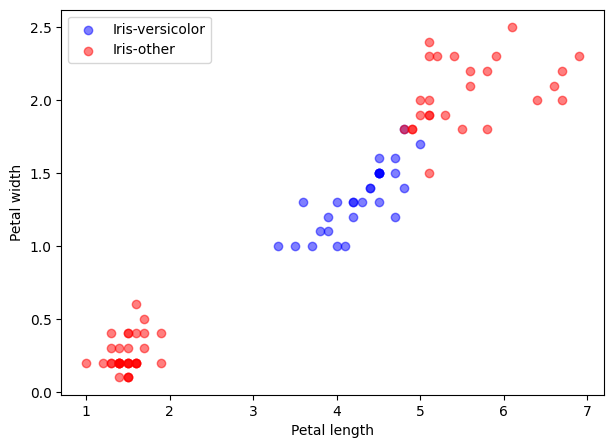

In [19]:
# Load the dataset
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

# Drop the sepal features
data = data.drop(['sepal length', 'sepal width'], axis=1)

# Replace the Iris-virginica and Iris-setosa classes with Iris-other
data['class'] = data['class'].replace('Iris-virginica', 'Iris-other')
data['class'] = data['class'].replace('Iris-setosa', 'Iris-other')

# Split the data into train/val/test
train, val, test = np.split(data.sample(frac=1, random_state=42), [int(.6*len(data)), int(.8*len(data))])

# Plot the dataset
fig, ax = plt.subplots(1, figsize=(7,5))
# Plot the versicolor instances
ax.scatter(train[train['class'] == 'Iris-versicolor']['petal length'],
               train[train['class'] == 'Iris-versicolor']['petal width'],
               label='Iris-versicolor',
               color='blue',
               alpha=0.5)

# Plot the other instances
ax.scatter(train[train['class'] == 'Iris-other']['petal length'],
               train[train['class'] == 'Iris-other']['petal width'],
               label='Iris-other',
               color='red',
               alpha=0.5)

ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()

If we train a linear SVM to classify these instances, the accuracy will be low. Train a linear SVM and plot the decision boundary to show this (use $C=100$).

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


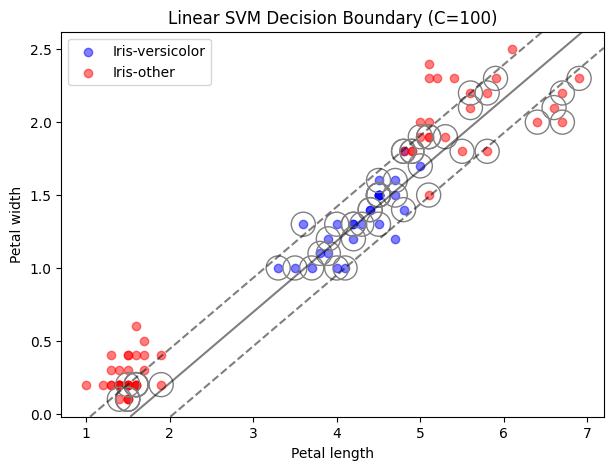

In [20]:
# YOUR CODE HERE
# SVM with Linear Kernel for Iris-versicolor vs. Iris-other
linear_svc_versicolor = SVC(kernel='linear', C=100)
linear_svc_versicolor.fit(train[['petal length', 'petal width']], train['class'])

# Plotting the dataset and decision boundary
fig, ax = plt.subplots(1, figsize=(7,5))

# Iris-versicolor instances in blue
ax.scatter(train[train['class'] == 'Iris-versicolor']['petal length'],
           train[train['class'] == 'Iris-versicolor']['petal width'],
           label='Iris-versicolor',
           color='blue',
           alpha=0.5)

# Iris-other instances in red
ax.scatter(train[train['class'] == 'Iris-other']['petal length'],
           train[train['class'] == 'Iris-other']['petal width'],
           label='Iris-other',
           color='red',
           alpha=0.5)

# SVM decision boundary
plot_svc_decision_function(linear_svc_versicolor, ax=ax)

# Labels and title
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()
ax.set_title(f'Linear SVM Decision Boundary (C=100)')


plt.show()


The radial basis function kernel will allow us to learn an elliptical decision boundary that will better fit the data. Train an SVM with RBF kernel and plot the decision boundary (use $C=100$).

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


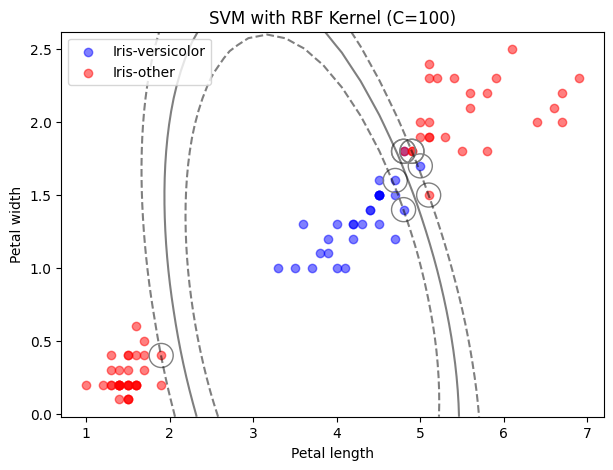

In [21]:
# YOUR CODE HERE
# SVM with RBF kernel for Iris-versicolor vs. Iris-other
rbf_svc_versicolor = SVC(kernel='rbf', C=100)
rbf_svc_versicolor.fit(train[['petal length', 'petal width']], train['class'])

# PlotTING the dataset and decision boundary
fig, ax = plt.subplots(1, figsize=(7,5))

# Iris-versicolor instances in blue
ax.scatter(train[train['class'] == 'Iris-versicolor']['petal length'],
           train[train['class'] == 'Iris-versicolor']['petal width'],
           label='Iris-versicolor',
           color='blue',
           alpha=0.5)

# Iris-other instances in red
ax.scatter(train[train['class'] == 'Iris-other']['petal length'],
           train[train['class'] == 'Iris-other']['petal width'],
           label='Iris-other',
           color='red',
           alpha=0.5)

# SVM decision boundary
plot_svc_decision_function(rbf_svc_versicolor, ax=ax)

# Labels and title
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()
ax.set_title(f'SVM with RBF Kernel (C=100)')


plt.show()


Compute and print the validation accuracy of your linear and RBF SVM classifiers.

In [22]:
# YOUR CODE HERE
from sklearn.metrics import accuracy_score

# Predictions on the validation set
y_pred_linear = linear_svc_versicolor.predict(val[['petal length', 'petal width']])
y_pred_rbf = rbf_svc_versicolor.predict(val[['petal length', 'petal width']])

# Accuracy
accuracy_linear = accuracy_score(val['class'], y_pred_linear)
accuracy_rbf = accuracy_score(val['class'], y_pred_rbf)


print(f"Validation Accuracy with Linear Kernel (C=100): {accuracy_linear:.4f}")
print(f"Validation Accuracy with RBF Kernel (C=100): {accuracy_rbf:.4f}")


Validation Accuracy with Linear Kernel (C=100): 0.7000
Validation Accuracy with RBF Kernel (C=100): 0.9667


Finally, use the best model (the one with the highest validation accuracy in the last cell) to compute the final accuracy on our test set.

In [23]:
# Since the RBF kernel (C=100) had the highest validation accuracy (96.67%), we will use it to compute the final accuracy on the test set.
# YOUR CODE HERE
# Predictions on the test set using the best model (RBF SVM)
y_pred_test = rbf_svc_versicolor.predict(test[['petal length', 'petal width']])

# Test accuracy
test_accuracy = accuracy_score(test['class'], y_pred_test)


print(f"Final Test Accuracy with RBF Kernel (C=100): {test_accuracy:.4f}")


Final Test Accuracy with RBF Kernel (C=100): 0.9667
